In [1]:
#Nur did this, you're welcome <3
#Naman loves y'all ;)
#Sam approves of these messages ^^
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## About the project:

The goal of this project is to create a tutorial for Data Science by performing essential DS pipeline steps on real data. We are using Affordable Housing data throughout the USA to show how the Data Science Pipeline can be used to attain useful information and make reasonable comparisions and conclusions. For example, we can find out what racial or age demographic inhibits these affordable apartments and use our historical knowledge to make reasonable assumption about these housing initiatives. This is also a tutorial of how evidence found in the data pipeline can be used conclusively, and our plan is to show that by cleaning, analysing and medling our Affordable housing data in this project.


## Phase 1&2: Data Collection and Management



In [2]:
pd.set_option('display.max_columns', None)
state_2018 = pd.read_excel("STATE_2018.xlsx")
state_2018 = state_2018.drop(['sub_program', 'entities', 'sumlevel', 'gsl', 'name', 'fedhse',
                              'cbsa', 'place', 'latitude', 'longitude', 'State', 'pha_total_units',
                              'months_since_report','pct_reported', 'pct_wage_major','pct_other_major',
                              'pct_lt50_median','pct_2adults','pct_1adult','pct_female_head',
                              'pct_female_head_child', 'pct_disabled_lt62','pct_disabled_ge62',
                              'pct_minority', 'pct_black_hsp','pct_wht_hsp','pct_oth_hsp',
                              'pct_multi','pct_median','months_waiting','months_from_movein',
                              'pct_bed1','pct_bed2','pct_bed3','pct_overhoused',
                              'tpoverty','tminority','tpct_ownsfd', 'pct_utility_allow',
                              'ave_util_allow', 'program', 'code', 'Quarter',
                              'ha_size'], axis=1)
state_2018 = state_2018[state_2018.program_label == 'Summary of All HUD Programs']
state_2018['States'] = state_2018['States'].str.slice(2)
state_2018.index = state_2018["States"].values
state_2018 = state_2018[state_2018.States != 'XX Missing']
state_2018 = state_2018.drop(columns=['States', 'program_label'])
state_2018 = state_2018.rename(columns={'total_units':'Total Units', 'pct_occupied':'Units Occupied (%)',
                           'number_reported':'Units Reported', 'people_total': 'Number of total Occupants',
                            'pct_movein':'% moved in less than 1 year', 'people_per_unit':'Occupancy/unit',
                            'rent_per_month':'Rent', 'spending_per_month':'Monthly Budget', 'hh_income':
                            'Household Income', 'person_income': 'Average Personal Income', 'pct_lt5k':
                            'Household Income %- (\$1-$5k)', 'pct_5k_lt10k': 'Household Income %- (\$5k-$10k)',
                            'pct_10k_lt15k': 'Household Income %- (\$10k-$15k)', 'pct_15k_lt20k':
                            'Household Income %- (\$15k-$20k)', 'pct_ge20k': 'Household Income %- (over \$20k)',
                            'pct_welfare_major':'% dependant on welfare', 'pct_lt30_median':
                            '% below 30% median wage', 'pct_disabled_all':'% of disabled occupants', 
                            'pct_lt24_head': 'Age of Household Head % - <24', 'pct_age25_50':
                            'Age of Household Head % -(25-50)', 'pct_age51_61': 'Age of Household Head % -(51-61)',
                            'pct_age62plus': 'Age of Household Head % -(62 plus)', 'pct_age85plus':
                            'Age of Household Head % -(85 plus)', 'pct_black_nonhsp': 'Occupants Race: Black',
                            'pct_native_american_nonhsp': 'Occupants Race: Native American',
                            'pct_asian_pacific_nonhsp': 'Occupants Race: Asian', 'pct_white_nothsp':
                            'Occupants Race: White', 'pct_hispanic': 'Occupants Race: Hispanic',})
state_2018

,Total Units,Units Occupied (%),Units Reported,% moved in less than 1 year,Occupancy/unit,Number of total Occupants,Rent,Monthly Budget,Household Income,Average Personal Income,Household Income %- (\$1-$5k),Household Income %- (\$5k-$10k),Household Income %- (\$10k-$15k),Household Income %- (\$15k-$20k),Household Income %- (over \$20k),% dependant on welfare,% below 30% median wage,% of disabled occupants,Age of Household Head % - <24,Age of Household Head % -(25-50),Age of Household Head % -(51-61),Age of Household Head % -(62 plus),Age of Household Head % -(85 plus),Occupants Race: Black,Occupants Race: Native American,Occupants Race: Asian,Occupants Race: White,Occupants Race: Hispanic
Alabama,91524,91,83571,16,2.2,181896,273,547,12063,5542,15,34,23,14,14,2,69,17,7,51,17,25,2,73,0,0,25,1
Alaska,7783,101,7740,16,2.1,16618,529,649,20491,9544,7,6,23,28,35,6,72,22,3,44,22,31,2,14,22,12,45,7
Arizona,41000,92,39000,11,2.3,89373,313,629,12817,5593,12,34,23,13,18,1,71,19,2,41,20,37,3,22,3,2,35,36
Arkansas,50521,90,45192,22,2.0,88799,272,448,11717,5963,12,37,26,14,11,1,64,24,8,43,20,29,2,51,0,0,45,2
California,491113,90,451733,7,2.1,945541,444,1040,17182,8209,5,10,43,16,26,8,78,24,1,32,20,46,7,28,1,16,27,28
Colorado,61820,91,56039,12,2.0,112509,335,737,13691,6819,9,33,24,15,19,5,81,25,3,39,21,37,3,19,1,2,45,29
Connecticut,82830,92,76242,8,2.0,152497,390,1222,16090,8044,7,28,20,15,28,3,81,21,2,40,20,38,5,30,0,1,28,39
Delaware,13030,91,11952,10,2.1,24849,350,718,14702,7072,9,26,24,17,24,3,75,19,6,42,19,34,3,68,0,1,22,7
District of Columbia,34477,83,28185,5,2.1,58427,364,1215,15257,7360,9,34,18,11,28,8,85,19,2,40,24,34,3,90,0,2,1,4
Florida,195822,92,184375,9,2.2,407463,343,744,13618,6162,10,36,21,13,19,1,73,21,3,41,17,39,4,52,0,1,17,29


In [3]:
head_of_house_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 4")

##Dropping columns 
head_of_house_df = head_of_house_df.drop(columns="Unnamed: 10")

##Renaming cols to match actual dataset
head_of_house_df.iloc[0, 0] = head_of_house_df.iloc[1, 0]
head_of_house_df.iloc[0, 2:8] = head_of_house_df.iloc[1, 2:8]
head_of_house_df.iloc[0, 9] = head_of_house_df.iloc[1, 9]
head_of_house_df.columns = head_of_house_df.iloc[0]

##Dropping rows that are irrelevant
head_of_house_df = head_of_house_df.drop(head_of_house_df.index[57:81])
head_of_house_df = head_of_house_df.drop([0,1])
##Getting rid of footnote
head_of_house_df = head_of_house_df.replace(to_replace = "New York1", value = "New York")

##Renaming indices
head_of_house_df.index = head_of_house_df.State.values

##Removing extra whitespaces from column names
head_of_house_df.columns = head_of_house_df.columns.str.replace('\s{2,}',' ', regex=True)

head_of_house_df

,State,Properties Reported (%),White Alone (%),Black or African American Alone (%),Asian Alone (%),American Indian and Alaska Native Alone (%),Native Hawaiian and Other Pacific Islander Alone (%),Other (including Multiple Race) (%),Hispanic (Any Race) (%),Race or Ethnicity Not Reported (%)
Alabama,Alabama,86.36364,34.45933,63.74529,0.30981,0.20529,0.10451,0.80624,0.35086,0.01866
Alaska,Alaska,100.00000,52.25753,6.68896,4.18060,18.22743,2.17391,0.25084,4.34783,11.87291
Arizona,Arizona,94.71154,35.68655,13.70379,1.21932,7.16837,0.29124,2.15129,33.10811,6.67133
Arkansas,Arkansas,98.32869,42.98514,43.62179,0.37727,0.25937,10.98797,0.56590,1.20255,0.00000
California,California,81.15494,24.97301,18.02942,0.00000,0.84126,0.00000,3.44880,38.61794,14.08958
Colorado,Colorado,84.25605,35.71180,11.20104,1.28039,0.70817,0.11065,3.39224,21.33350,26.26221
Connecticut,Connecticut,91.57895,30.98213,27.23370,0.01745,0.52352,0.00000,1.83582,29.51277,9.89460
Delaware,Delaware,98.42520,24.79282,65.19337,0.69061,0.63536,0.15193,0.95304,7.56906,0.01381
District of Columbia,District of Columbia,71.96262,2.46130,80.92712,0.34789,0.18264,0.07827,0.97408,6.07932,8.94938
Florida,Florida,92.34194,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000


In [4]:
##Drop cols 
# family_comp_df = family_comp_df.drop(columns = ["Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])
family_comp_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 7")

##Renaming cols to match actual dataset
family_comp_df.iloc[0, 0] = family_comp_df.iloc[1, 0]
family_comp_df.iloc[0, 2:4] = family_comp_df.iloc[1, 2:4]
family_comp_df.columns = family_comp_df.iloc[0]

##Dropping rows that are irrelevant
family_comp_df = family_comp_df.drop(family_comp_df.index[57:66])
family_comp_df = family_comp_df.drop([0,1])
##Getting rid of footnote
family_comp_df = family_comp_df.replace(to_replace = "New York2", value = "New York")

##Replacing missing values w/ nan
family_comp_df = family_comp_df.replace(to_replace = "Data Not Reported", value = np.nan) 

##Renaming indices
family_comp_df.index = family_comp_df.State.values
family_comp_df

##Removing extra whitespaces from column names
family_comp_df.columns = family_comp_df.columns.str.replace('\s{2,}',' ', regex=True)

##Getting rid of footname in column name
family_comp_df = family_comp_df.rename(columns={"All Household Members Reported1 (% of Households)": "All Household Members Reported (% of Households)"})

family_comp_df

,State,All Household Members Reported (% of Households),Head of Household (%),All Reported Members (%),At Least One Member < 18 (%),At Least One Member >= 62 (%),Reported Head of Household >= 62 (%),NaN,NaN,NaN
Alabama,Alabama,92.45592,99.98210,99.90904,37.55631,31.21141,30.64165,NaN,NaN,NaN
Alaska,Alaska,77.47126,99.15709,99.06250,33.40996,33.10345,32.33716,NaN,NaN,NaN
Arizona,Arizona,99.37811,99.95966,99.81042,45.06522,31.83071,30.57348,NaN,NaN,NaN
Arkansas,Arkansas,99.98844,99.69946,99.59094,36.29638,31.19870,30.71321,NaN,NaN,NaN
California,California,95.26921,99.78389,99.78015,36.73368,41.57440,39.76464,NaN,NaN,NaN
Colorado,Colorado,99.51023,99.67349,99.68896,35.53325,31.35287,30.42955,NaN,NaN,NaN
Connecticut,Connecticut,96.24147,96.67155,97.91855,29.43248,41.41241,40.38396,NaN,NaN,NaN
Delaware,Delaware,100.00000,99.98622,94.60915,39.23649,30.89857,30.44377,NaN,NaN,NaN
District of Columbia,District of Columbia,69.09379,96.33291,97.05082,27.45039,25.42821,24.74911,NaN,NaN,NaN
Florida,Florida,10.17116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reading in table 2.
disabilities_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 6")

## Parsing data from excel file

# Retrieving row names from first row and removing whitespace.
col_names = disabilities_df.iloc[0, 1:].str.replace(r'\s{2,}', '', regex=True).values
# Retrieving states from first column to use as indexes.
states = disabilities_df.iloc[2:57, 0].values
# Removing extra rows and columns.
disabilities_df = disabilities_df.iloc[2:57, 1:]

disabilities_df.columns = col_names
disabilities_df.index = states

disabilities_df

,Properties Reported(%),All Household Members Reported1(% of Households),Disability Statusis Reported(% of Individuals),Reported as Disabled(% of Individuals),NaN,NaN,NaN,NaN,NaN
Alabama,86.36364,92.45592,99.99202,2.8581,NaN,NaN,NaN,NaN,NaN
Alaska,100,77.47126,78.16406,6.75781,NaN,NaN,NaN,NaN,NaN
Arizona,94.71154,99.37811,100,5.20868,NaN,NaN,NaN,NaN,NaN
Arkansas,98.32869,99.98844,100,0,NaN,NaN,NaN,NaN,NaN
California,81.15494,95.26921,93.81512,6.296,NaN,NaN,NaN,NaN,NaN
Colorado,84.25605,99.51023,100,3.17314,NaN,NaN,NaN,NaN,NaN
Connecticut,91.57895,96.24147,96.19769,11.11985,NaN,NaN,NaN,NaN,NaN
Delaware,98.4252,100,100,3.79609,NaN,NaN,NaN,NaN,NaN
District of Columbia,71.96262,69.09379,61.23936,2.86141,NaN,NaN,NaN,NaN,NaN
Florida,92.34194,10.17116,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
household_income_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 8")

# Drop the the irrelevant rows and columns
household_income_df = household_income_df.drop(columns=['Unnamed: 9'])
household_income_df = household_income_df.drop([57,58,59,60,61])

# Get the correct headers
household_income_df.iloc[0, 0] = household_income_df.iloc[1, 0]
household_income_df.iloc[0, 3:9] = household_income_df.iloc[1, 3:9]

# Replace '$' with '\$' so that it would not be recognized as inline math
for i in range(5, 8):
    household_income_df.iloc[0][i] = household_income_df.iloc[0][i].replace('$', '\$')

# Set the new headers
household_income_df.columns = household_income_df.iloc[0]

# Clean up
household_income_df = household_income_df.iloc[2:]
household_income_df = household_income_df.replace('New York1','New York')
household_income_df = household_income_df.replace(to_replace = "Data Not Reported", value = np.nan)
household_income_df.columns = household_income_df.columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
household_income_df.index = household_income_df.iloc[:58, 0].values
household_income_df = household_income_df.drop(columns=['State'])
household_income_df

,Properties Reported (%),Income Reported (%),Median Income ($),"<= $5,000 (%)","\$5,001 to \$10,000 (%)","\$10,001 to \$15,000 (%)","\$15,001 to \$20,000 (%)","> $20,000 (%)"
Alabama,86.36364,96.42633,16380.0,5.70456,18.78422,20.12993,20.35576,35.02552
Alaska,100.00000,78.39081,21487.0,3.81232,2.93255,14.07625,25.31769,53.86119
Arizona,94.71154,98.28224,18912.0,6.59438,15.63772,15.58299,14.57742,47.60748
Arkansas,98.32869,99.04057,13068.0,10.64426,25.53688,22.01214,16.69001,25.11671
California,81.15494,93.76841,20764.0,2.95568,5.23305,26.53737,13.63478,51.63913
Colorado,84.25605,97.77064,22581.0,4.45637,14.42297,12.85996,11.86357,56.39713
Connecticut,91.57895,97.08293,18696.0,3.80726,20.75696,15.81972,12.22433,47.39174
Delaware,98.42520,99.24201,19476.0,5.98528,14.20636,16.21997,15.26177,48.32662
District of Columbia,71.96262,92.34890,24324.0,8.89779,16.85595,9.62497,7.23915,57.38214
Florida,92.34194,7.44615,24075.0,2.32641,8.81353,10.08411,13.75268,65.02326


In [7]:
federal_asst_df = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name="Table 12")

# Drop the the irrelevant rows
federal_asst_df = federal_asst_df.drop([57,58,59,60,61])

# Get the correct headers
federal_asst_df.iloc[0, 0] = federal_asst_df.iloc[1, 0]
federal_asst_df.iloc[0, 4:13] = federal_asst_df.iloc[1, 4:13]

# Set the new headers
federal_asst_df.columns = federal_asst_df.iloc[0]

# Clean up
federal_asst_df = federal_asst_df.iloc[2:]
federal_asst_df = federal_asst_df.replace('New York1','New York')
federal_asst_df = federal_asst_df.replace(to_replace = "Data Not Reported", value = np.nan)
federal_asst_df.columns = federal_asst_df.columns.str.replace('\s{2,}',' ', regex=True)

# Set the state names to be the indices 
federal_asst_df.index = federal_asst_df.iloc[:58, 0].values
federal_asst_df = federal_asst_df.drop(columns=['State'])
federal_asst_df = federal_asst_df.iloc[:-2, :]
federal_asst_df

,Reported Amount of Federal Rental Assistance > $0 (%),Source of Federal Rental Assistance Reported (%),Source of Federal Rental Assistance,HUD Section 8 Moderate Rehabilitation (%),Public Housing Operating Subsidy (%),HOME Rental Assistance (%),"HUD Housing Choice Voucher (HCV), Tenant-Based (%)",HUD Project-Based Voucher (PBV) (%),USDA Section 521 Rental Assistance Program (%),Other Federal Rental Assistance (%),Not Reported (%),Total (%)
Alabama,38.64736,38.64736,13.59965,0.00000,0.00000,0.00728,19.34076,0.00000,18.66405,48.38827,0.0,100.00001
Alaska,36.41577,34.98208,1.63934,12.90984,0.20492,0.00000,14.54918,17.82787,52.86885,0.00000,0.0,100.00000
Arizona,12.08103,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,20.89051,20.44245,6.74658,0.78767,0.13699,0.06849,12.97945,35.00000,38.93836,5.34247,0.0,100.00001
California,37.99137,35.89672,21.51056,3.55344,0.83879,0.96447,29.59122,31.48384,8.99392,3.06376,0.0,100.00001
Colorado,8.66158,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,60.25954,50.51456,27.32704,0.95591,1.64894,0.11351,17.06894,42.53196,1.78038,8.57331,0.0,99.99999
Delaware,18.44132,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,13.91698,13.85787,29.09953,0.00000,0.00000,0.00000,8.24645,62.60663,0.00000,0.04739,0.0,100.00000
Florida,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Phase 3: Exploratory Data Analysis

Now we have all the relevant data collected and cleaned up, we can start using statistical graphs and other data visualization methods to summarize the main characteristics from the data sets above. Through exploratory data analysis, we can expect to see more context and deeper interpretation of the data we are handling, and possibly formulate new hypotheses that could lead to further data collection and analysis. In the EDA phase of this tutorial, we will mainly use bar charts and stacked bar charts to visualize the data we are handling, and we will be using tools like `matplotlib.pyplot` and `pandas.DataFrame.plot` to plot these charts.  <br/>

First, we will start by showing the graph for total affordable units and their occupancies across the states. As the legend indicates, we are using blue to represent the total affordable units in each state, and we are using orange to represent the total occupancies of the affordable unitzs in each state. As shown by the chart, we can see that for most states, the number of the total occupancies is roughly twice the number of the total affordable units. Two outliers are Guam and Northern Mariana Islands; their numbers of occupancies are over four times the number of affordable units. Besides, we can observe that California, New York, and Texas have significantly hihger numbers of total affordable units and occupancies than the rest of the states. It is also worth noting that California, New York, and Texas are among the most populous states, and thus we may hypothesize that there might be a correlation between the population of the state and the number of affordable units and occupancies.

Text(0.5, 1.0, 'Total Affordable units and their Occupancies for every State')

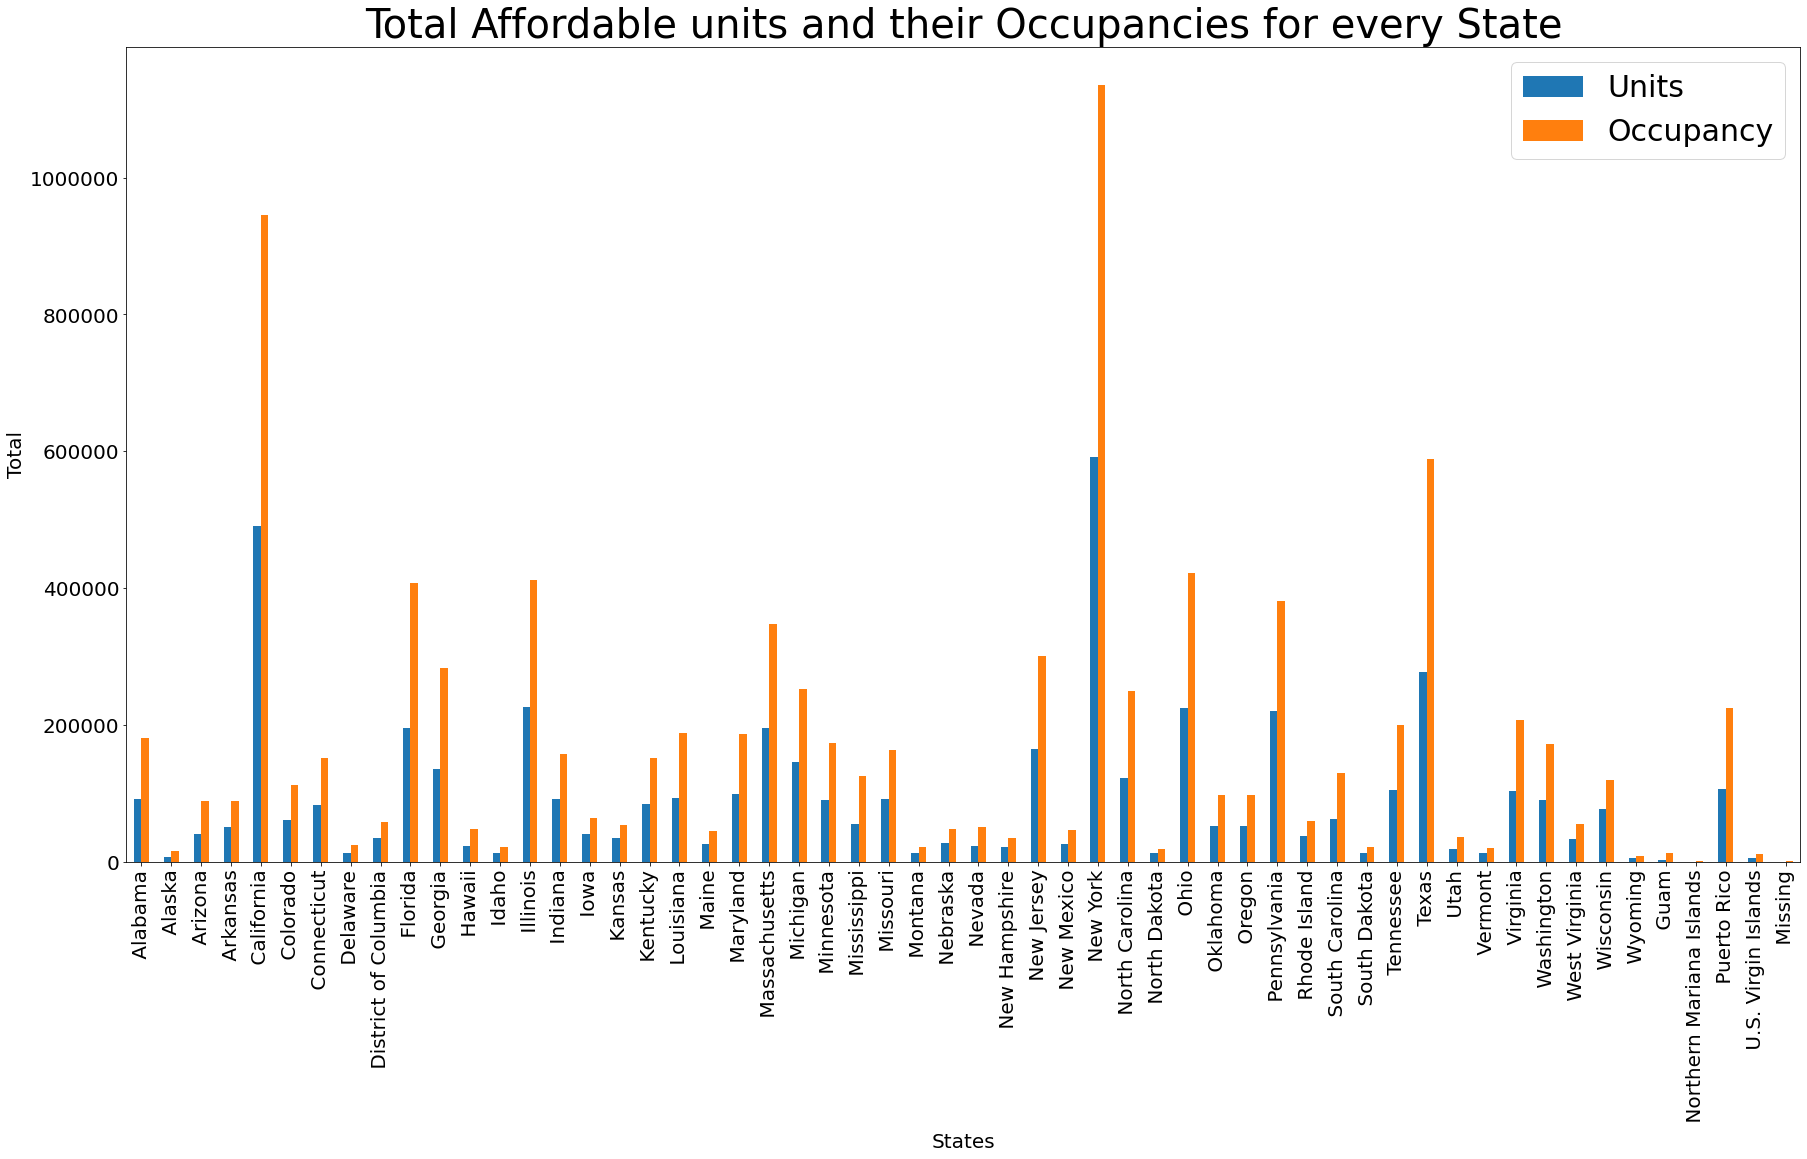

In [8]:
df = pd.DataFrame({'Units': state_2018['Total Units'].values,
                  'Occupancy': state_2018['Number of total Occupants'].values
                  }, index=state_2018.index)

ax = df.plot.bar( figsize=(30, 15))
plt.xlabel('States', fontsize=20)
plt.ylabel('Total', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend( prop={'size': 30})
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_minor_formatter(NullFormatter())
plt.title('Total Affordable units and their Occupancies for every State', fontsize=40)

Next, we are making stacked bar charts to demonstrate the percentage of different age groups of household heads in each state, as well as the distribution of race of heads of household in each state. <br/>

In the stacked bar charts for the percentage of different age groups of household heads in each state, we can see that 


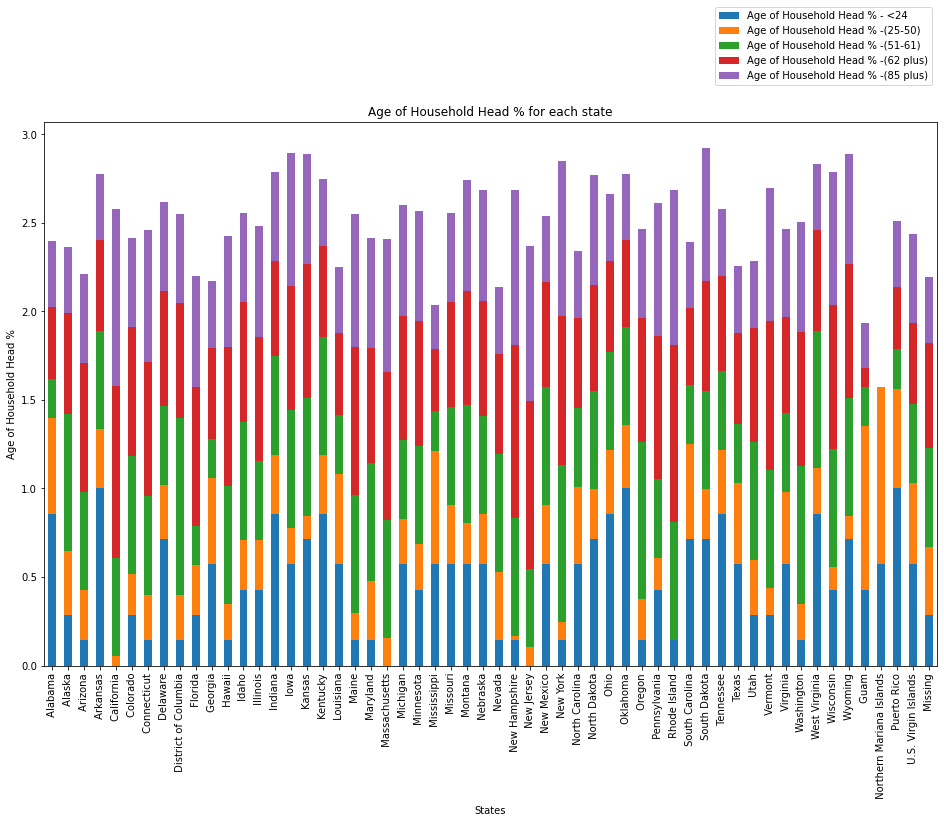

In [9]:
##Creating a new dataframe for plotting
household_age = state_2018[["Age of Household Head % - <24", "Age of Household Head % -(25-50)", "Age of Household Head % -(51-61)", "Age of Household Head % -(62 plus)", "Age of Household Head % -(85 plus)"]]

##Normalize
x = household_age.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
household_age = pd.DataFrame(x_scaled)


##Setting indices and renaming cols
household_age.index = state_2018.index
household_age.columns = ['Age of Household Head % - <24', 'Age of Household Head % -(25-50)', 'Age of Household Head % -(51-61)', 'Age of Household Head % -(62 plus)', 'Age of Household Head % -(85 plus)']

##Plotting
household_age.plot.bar(stacked=True, xlabel="States", ylabel="Age of Household Head %", figsize=(16, 10), title= "Age of Household Head % for each state")

##Moving legend outside for easier reading
plt.legend(loc='center right', bbox_to_anchor=(1.0, 1.14))

The stacked bar chart for the distribution of race of heads of household in each states shows the race composition of the affordable household head . <br/>

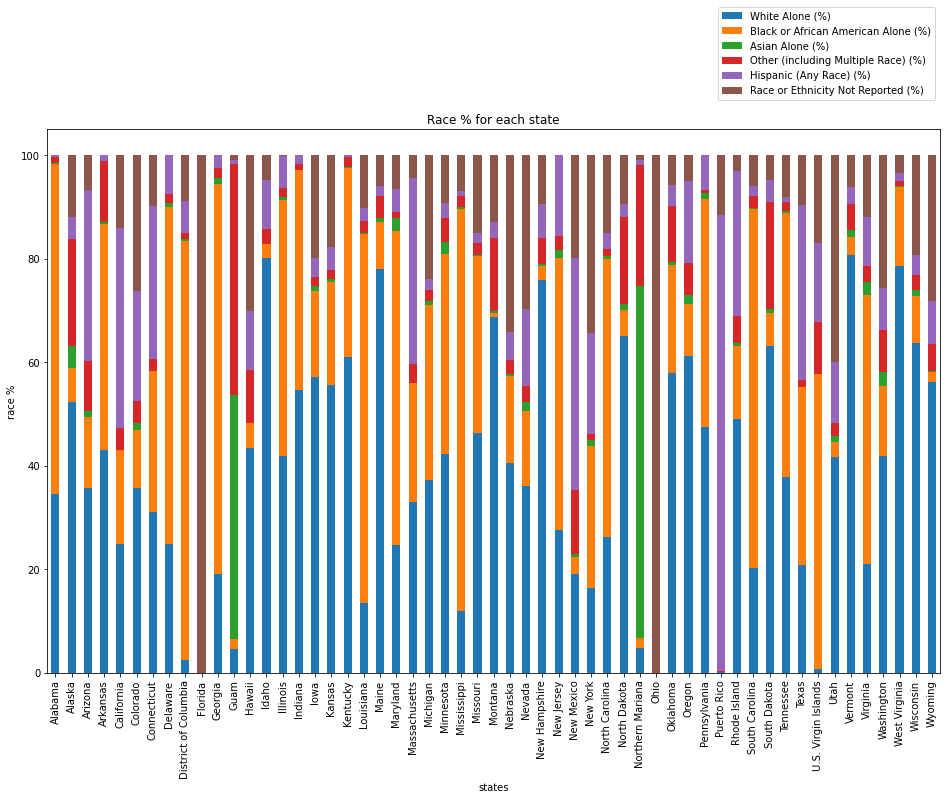

In [10]:
##Creating a new dataframe for plotting
race_data_per_state = head_of_house_df

##Put American Indian & Alaska Native Alone and Native Hawaiian and Other Pacific Islander Alone (%) together w/ Other catergory
race_data_per_state["Other (including Multiple Race) (%)"] = head_of_house_df["American Indian and Alaska Native Alone (%)"] +head_of_house_df["Native Hawaiian and Other Pacific Islander Alone (%)"] + head_of_house_df["Other (including Multiple Race) (%)"]

##Dropping cols that aren't relevant
race_data_per_state = race_data_per_state.drop(columns = ["Properties Reported (%)", "American Indian and Alaska Native Alone (%)", "Native Hawaiian and Other Pacific Islander Alone (%)"])

##Plotting
race_data_per_state.plot.bar(stacked=True, xlabel="states", ylabel="race %", figsize=(16, 10), title= "Race % for each state")

##Moving legend outside of plot for easier viewing
plt.legend(loc='center right', bbox_to_anchor=(1.0, 1.14))


Now we are plotting a bar chart to show the median reported income of LIHTC households in each state, together with a stacked bar chart to show the distribution of the income of LIHTC households in each state, with an interval of \$5,000.

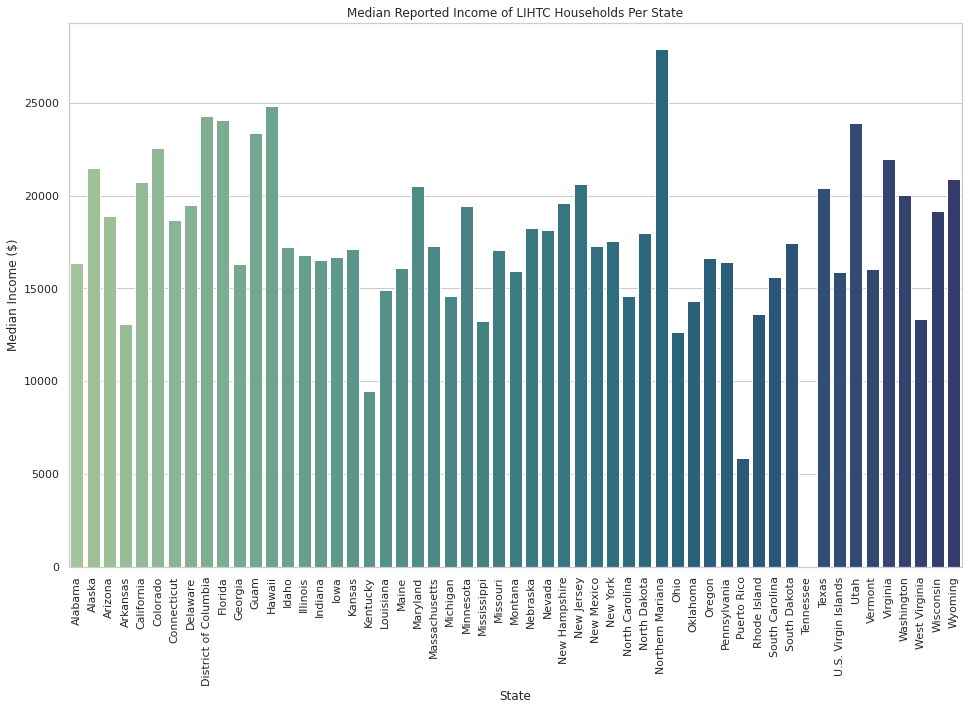

<AxesSubplot:title={'center':'Distribution of Income of LIHTC Households Per State'}, xlabel='State', ylabel='Percentage'>

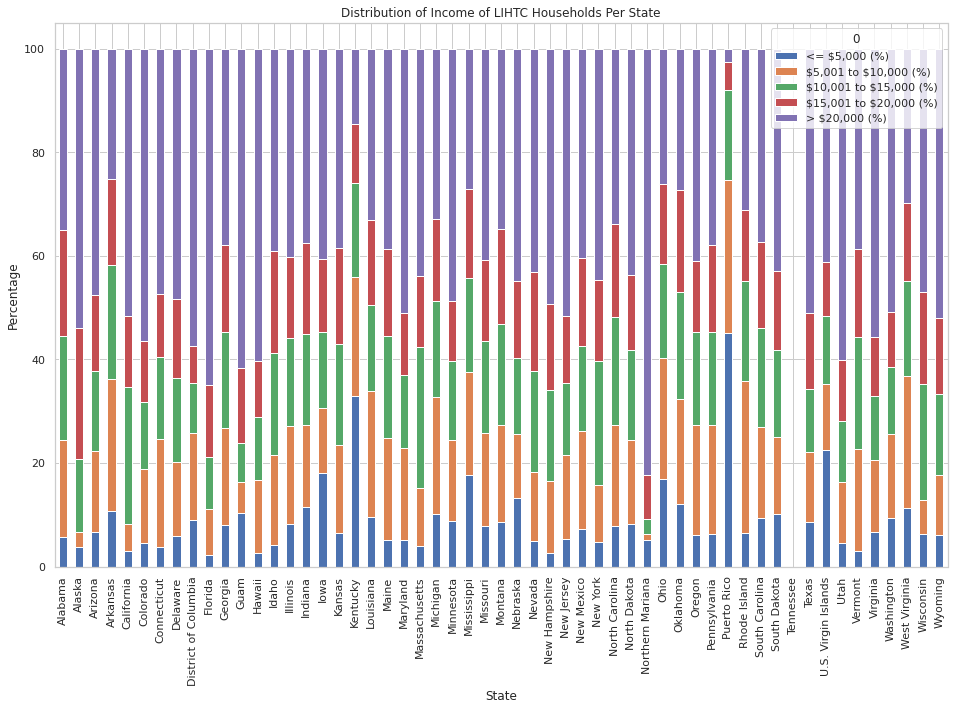

In [11]:
# Set the figure size
plt.figure(figsize=(16,10))

# Set the figure style
sns.set_theme(style='whitegrid')

median_income_by_state = sns.barplot(y='Median Income ($)', x= household_income_df.index, data = household_income_df, palette=sns.color_palette("crest", household_income_df.index.size))
median_income_by_state.set_xticklabels(median_income_by_state.get_xticklabels(), rotation=90)

# Set the x- and y-axis labels and title
plt.xlabel('State')
plt.ylabel('Median Income ($)')
plt.title('Median Reported Income of LIHTC Households Per State')
plt.show()
distribution_of_income = pd.DataFrame(household_income_df[['<= $5,000 (%)', '\$5,001 to \$10,000 (%)', '\$10,001 to \$15,000 (%)','\$15,001 to \$20,000 (%)', '> $20,000 (%)']])
distribution_of_income.plot.bar(figsize=(16,10), stacked=True, xlabel='State', ylabel='Percentage', title='Distribution of Income of LIHTC Households Per State')


Finally, we are plotting a bar chart to show the percentage of the reported amount of federal rental assistance and other federal rental assistance received in each state.


For most states, the amount of federal rental assistance was reported, 

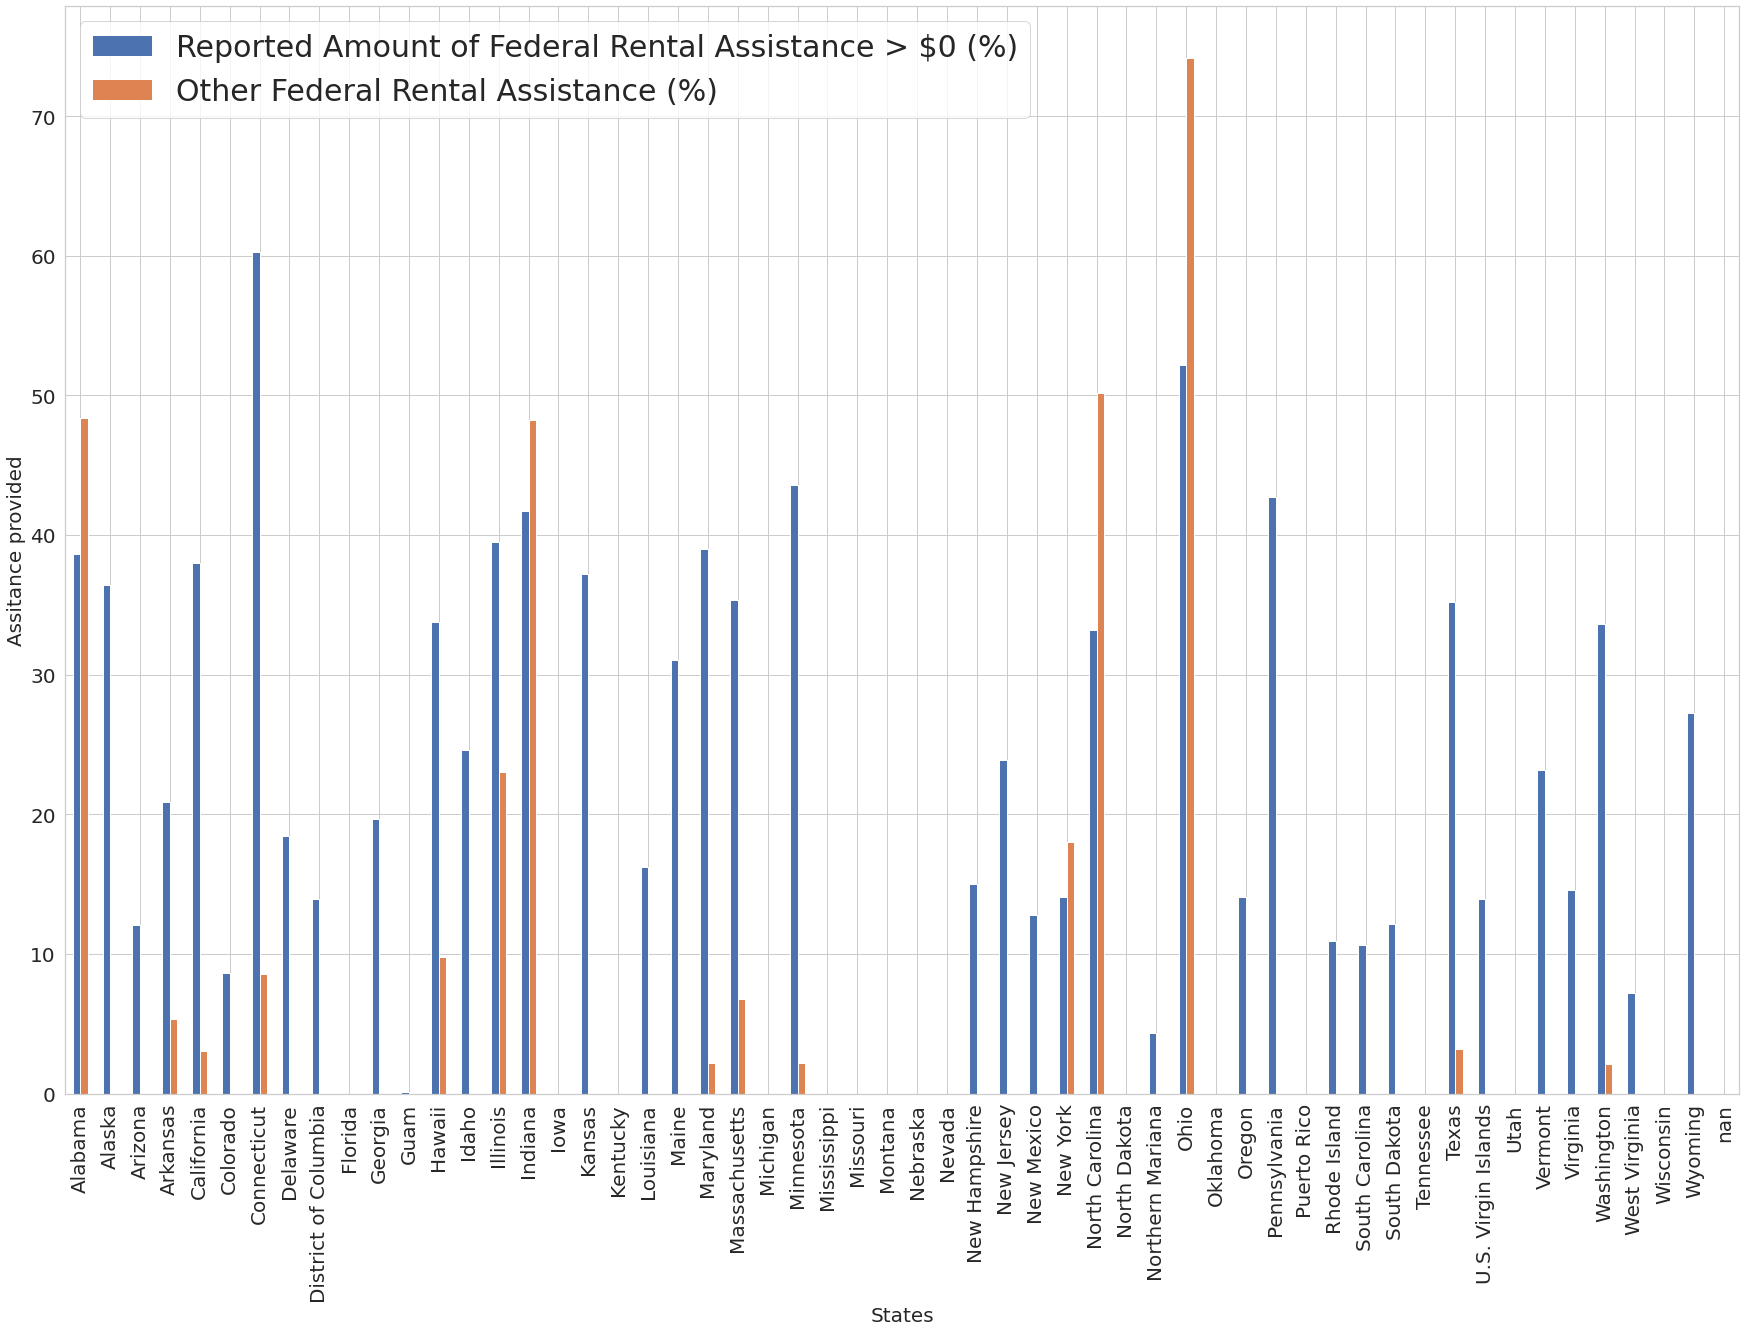

In [12]:
cols = [federal_asst_df.columns[0], federal_asst_df.columns[9]]
ax = federal_asst_df.plot.bar(y=cols, figsize=(30,20))
plt.xlabel('States', fontsize=20)
plt.ylabel('Assitance provided', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(prop={'size': 30})
plt.show()

NOTES:

     -state2018 table indices had whitespace before the state so i removed it and dropped missing col so X and Y had 
      the same shape

     -Linear regression w/ NaN values fixes

    -replacing val w/ 0 or col mean value? 
        -used fillna but inplace wasnt working on my end so i changed it so it stores into another df w/o modifying the    
         original
  
 

In [13]:
#Correlation occupancy of affordable housing and median income per state.
state_2018.index = state_2018.index.str.strip()

state_2018 = state_2018.rename(index={'Northern Mariana Islands': 'Northern Mariana'})
state_2018 = state_2018.drop("Missing")

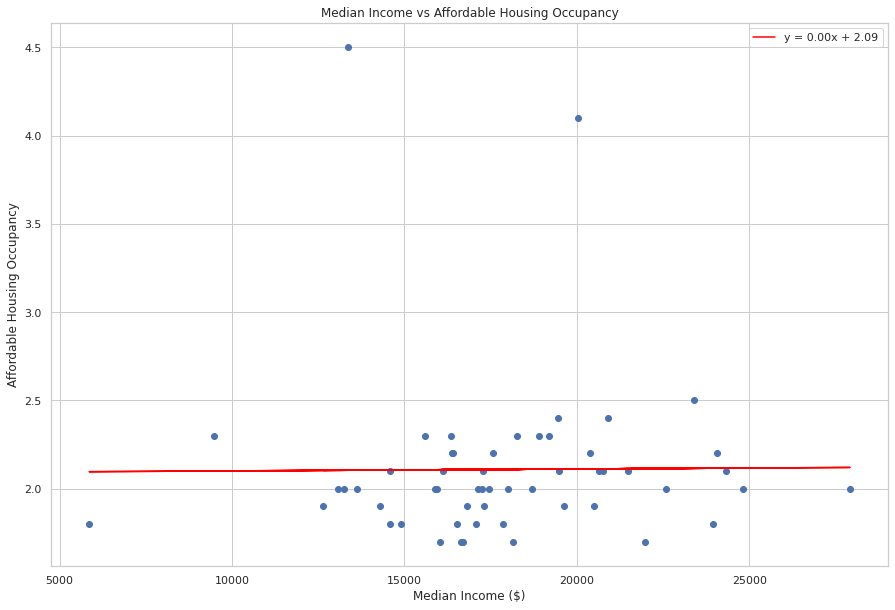

In [14]:
##Missing val, replace val w/ mean of column (also is the default func of sklearn imputer)
household_income_df_mod = household_income_df.fillna(household_income_df.mean())

##OR replace w/ 0
#household_income_df["Median Income ($)"].fillna(0, inplace=True)

##Reshaping cols for linear regression
X = household_income_df_mod["Median Income ($)"].values.reshape(-1,1)
Y = state_2018["Occupancy/unit"].values.reshape(-1,1)

##Creating linear regression
lin_regr = LinearRegression()
reg = lin_regr.fit(X, Y)

##Predictions
Y_pred = lin_regr.predict(X)

m = reg.coef_[0][0]
b = reg.intercept_[0]

line_label = "y = {:.2f}x + {:.2f}".format(m, b)

##Plotting
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red', label=line_label)
plt.xlabel("Median Income ($)")
plt.ylabel("Affordable Housing Occupancy")
plt.title("Median Income vs Affordable Housing Occupancy")
plt.legend(loc='upper right')

plt.show()

In [15]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.004153
Date:                Sun, 16 May 2021   Prob (F-statistic):              0.949
Time:                        06:21:14   Log-Likelihood:                -36.594
No. Observations:                  55   AIC:                             77.19
Df Residuals:                      53   BIC:                             81.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0897      0.308      6.780      0.0

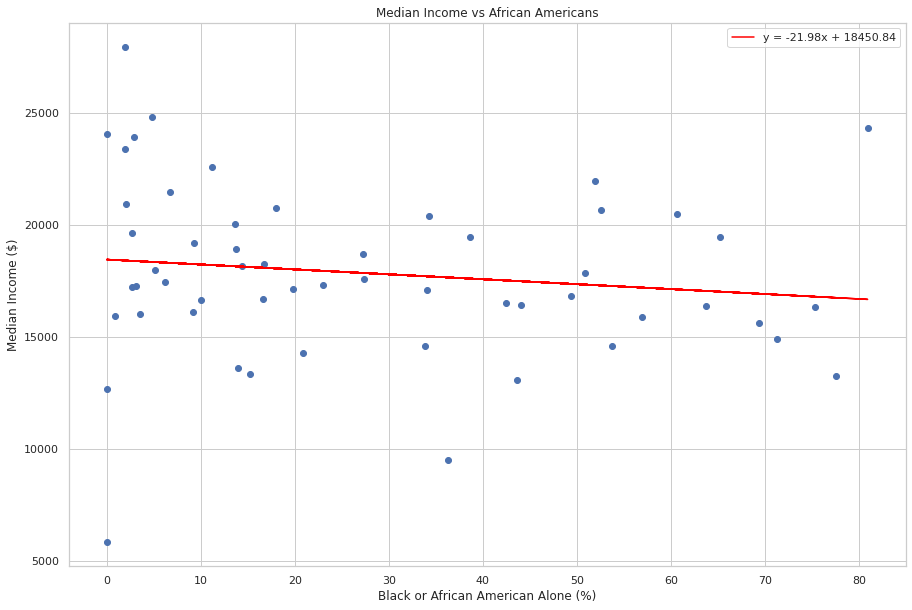

In [16]:
##Median income vs African Americans

##Reshaping cols for linear regression
X = head_of_house_df["Black or African American Alone (%)"].values.reshape(-1,1)
Y = household_income_df_mod["Median Income ($)"].values.reshape(-1,1)

##Creating linear regression
lin_regr = LinearRegression()
reg = lin_regr.fit(X, Y)

##Predictions
Y_pred = lin_regr.predict(X)

m = reg.coef_[0][0]
b = reg.intercept_[0]

line_label = "y = {:.2f}x + {:.2f}".format(m, b)

##Plotting
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red', label=line_label)
plt.ylabel("Median Income ($)")
plt.xlabel("Black or African American Alone (%)")
plt.title("Median Income vs African Americans")
plt.legend(loc='upper right')

plt.show()

In [17]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.051
Date:                Sun, 16 May 2021   Prob (F-statistic):              0.310
Time:                        06:21:15   Log-Likelihood:                -531.27
No. Observations:                  55   AIC:                             1067.
Df Residuals:                      53   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.845e+04    786.368     23.463      0.0

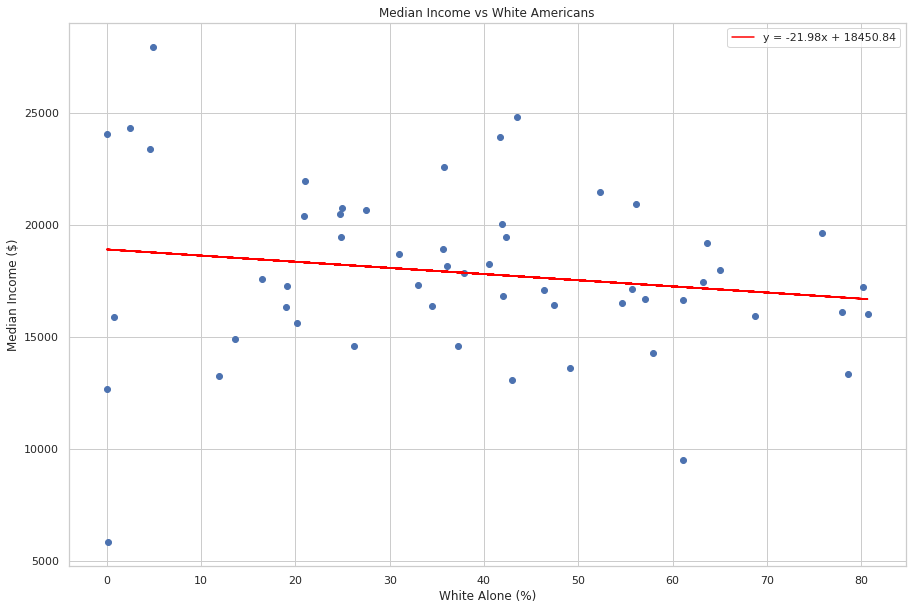

In [18]:
## Median Income vs White People
X = head_of_house_df["White Alone (%)"].values.reshape(-1,1)
Y = household_income_df_mod["Median Income ($)"].values.reshape(-1,1)

##Creating linear regression
lin_regr = LinearRegression()
lin_regr.fit(X, Y)

##Predictions
Y_pred = lin_regr.predict(X)

m = reg.coef_[0][0]
b = reg.intercept_[0]

line_label = "y = {:.2f}x + {:.2f}".format(m, b)

##Plotting
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red', label=line_label)
plt.ylabel("Median Income ($)")
plt.xlabel("White Alone (%)")
plt.title("Median Income vs White Americans")
plt.legend(loc='upper right')

plt.show()

In [19]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.428
Date:                Sun, 16 May 2021   Prob (F-statistic):              0.237
Time:                        06:21:16   Log-Likelihood:                -531.08
No. Observations:                  55   AIC:                             1066.
Df Residuals:                      53   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.89e+04   1024.494     18.450      0.0

In [20]:
## Correlation of federal assistance and median income

X = federal_asst_df["Source of Federal Rental Assistance Reported (%)"].values.reshape(-1,1)
Y = household_income_df_mod["Median Income ($)"].values.reshape(-1,1)

##Creating linear regression
lin_regr = LinearRegression()
lin_regr.fit(X, Y)

##Predictions
Y_pred = lin_regr.predict(X)

m = reg.coef_[0][0]
b = reg.intercept_[0]

line_label = "y = {:.2f}x + {:.2f}".format(m, b)

##Plotting
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red', label=line_label)
plt.xlabel("Source of Federal Rental Assistance Reported (%)")
plt.ylabel("Median Income ($)")
plt.title("Federal Assistance and Median Income")
plt.legend(loc='upper right')

plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
results = model.fit()
print(results.summary())

In [ ]:
##Correlation of other federal assistance and median income

##Replace NaN w/ 0
federal_asst_df_mod = federal_asst_df.fillna(0)

X = federal_asst_df_mod["Other Federal Rental Assistance (%)"].values.reshape(-1,1)

##Creating linear regression
lin_regr = LinearRegression()
lin_regr.fit(X, Y)

##Predictions
Y_pred = lin_regr.predict(X)

##Plotting
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.xlabel("Other of Federal Rental Assistance (%)")
plt.ylabel("Median Income ($)")
plt.title("Other Federal Assistance and Median Income")
plt.show()

In [ ]:
#Each age group is correlated with median income
age_groups = ["Age of Household Head % - <24", "Age of Household Head % -(25-50)", "Age of Household Head % -(51-61)", "Age of Household Head % -(62 plus)", "Age of Household Head % -(85 plus)"]

Y = household_income_df_mod["Median Income ($)"].values.reshape(-1,1)

for age in age_groups:
    ##Getting age group vals
    X = state_2018[age].values.reshape(-1,1)

    ##Creating linear regression
    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    ##Predictions
    Y_pred = lin_regr.predict(X)

    ##Plotting
    plt.scatter(X,Y)
    plt.plot(X,Y_pred, color='red')
    plt.xlabel(age)
    plt.ylabel("Median Income ($)")
    plt.title(age + " vs Median Income ($)")
    plt.show()